<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Matematika_dlya_Data_Science/Osnovy_statistiki/DZ_Kondratev_MDS_36_HW_9_upd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Центральная предельная теорема и статистика".

## Задание.

В этом задании нужно убедиться, что ЦПТ действительно работает.

Создайте случайную величину из [любого выбранного вами распределения](https://docs.scipy.org/doc/scipy/reference/stats.html), для разных значений `n` сгенерируйте 1000 выборок размера `n`. Постройте гистрограммы средних этих выборок и сделайте выводы.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import gaussian_kde
import seaborn as sns
from scipy.stats import norm

In [113]:
rv = sts.expon() # выбираем распределение
sample = rv.rvs(size=1000)

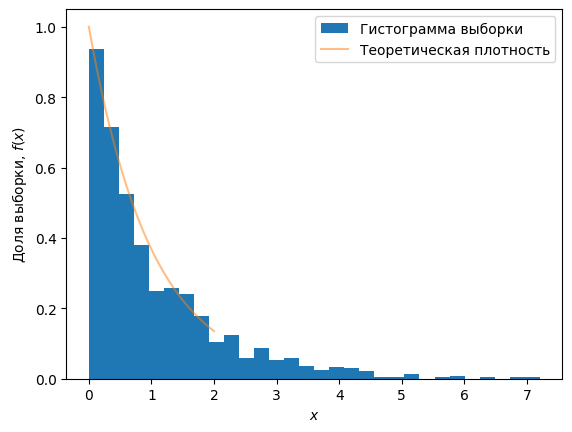

In [114]:
x = np.linspace(0,2,100)
pdf = rv.pdf(x)
plt.hist(sample, density=True, bins=30, label='Гистограмма выборки')
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.ylabel('Доля выборки, $f(x)$')
plt.xlabel('$x$')
plt.show()

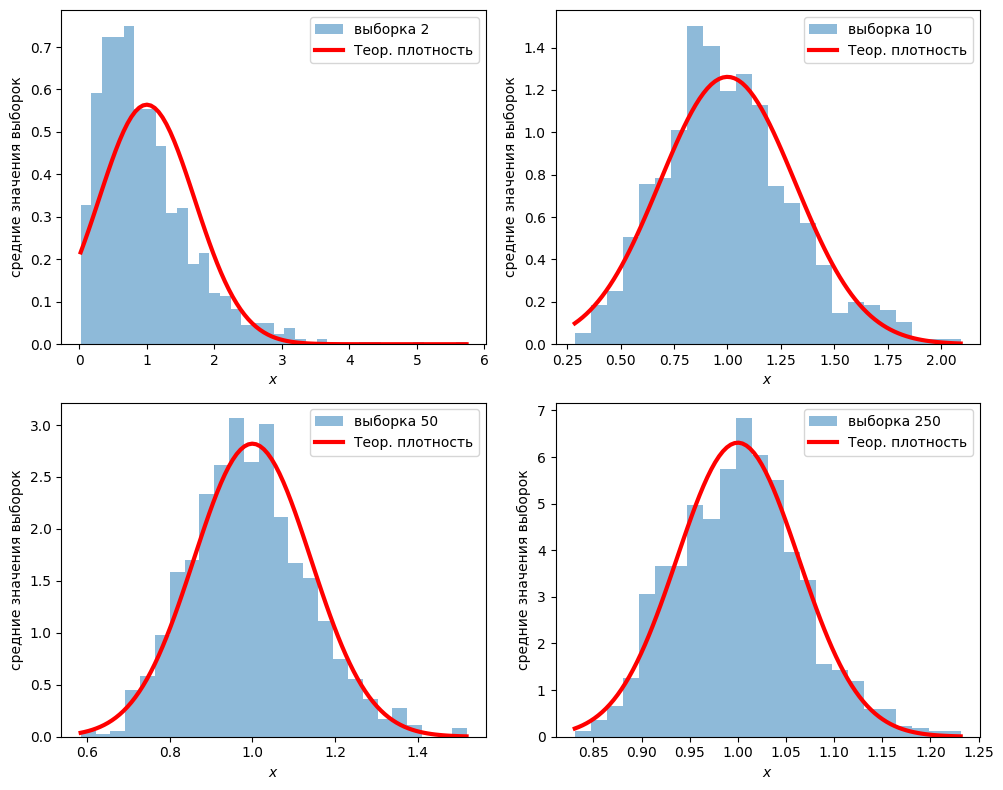

               2            10           50           250
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.983923     1.004247     0.993732     1.001841
std       0.693394     0.306924     0.141943     0.064705
min       0.020994     0.285727     0.584634     0.830732
25%       0.488347     0.793253     0.896550     0.955756
50%       0.828402     0.969185     0.987027     1.001063
75%       1.301709     1.185418     1.081918     1.042071
max       5.735347     2.091362     1.518083     1.231427


In [108]:
# Рисуем графики для разных значений n
n_values = [2, 10, 50, 250]  # Разные значения n
data = {}
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Создаем сетку для графиков

for i in range(len(n_values)):
    n = n_values[i]
    sample_means = np.array([])  # Массивы для сохранения средних по выборкам
    samples_count = 1000  # Количество повторов генерации

    for number in range(samples_count):
        sample = rv.rvs(size=n)  # На каждом цикле генерируем выборки указанных размеров
        sample_means = np.append(sample_means, sample.mean())  # Считаем среднее по каждой выборке и добавляем в массив средних

    data[n] = sample_means

    label = 'выборка ' + str(n)  # Подписи для графиков
    axs.flat[i].hist(sample_means, bins='auto', density=True, label=label, alpha=0.5)  # Строим гистограмму в соответствующей ячейке сетки
    axs.flat[i].legend()
    axs.flat[i].set_ylabel('средние значения выборок')
    axs.flat[i].set_xlabel('$x$')

    # Строим график плотности вероятности нормального распределения
    x = np.linspace(sample_means.min(), sample_means.max(), 100)
    axs.flat[i].plot(x, sts.norm.pdf(x, loc=rv.mean(), scale=rv.std()/np.sqrt(n)), color='red', lw=3, label='Теор. плотность')
    axs.flat[i].legend()  # Добавляем легенду для гистограммы и графика плотности

plt.tight_layout()  # Располагаем графики в сетке
plt.show()

df = pd.DataFrame(data)
summary = df.describe()
print(summary)


Из таблицы можно сделать следующие выводы:

1. Среднее значение выборочного среднего приближается к математическому ожиданию исходного распределения с увеличением размера выборки. Это подтверждает работу ЦПТ.

2. Стандартное отклонение выборочного среднего уменьшается с увеличением размера выборки. Это означает уменьшение разброса и более точную оценку среднего значения исходного распределения.

3. Значения минимума и максимума выборочного среднего также приближаются к математическому ожиданию с увеличением размера выборки. Это означает, что с увеличением размера выборки значения среднего становятся более стабильными и менее случайными.

4. Значения перцентилей (25%, 50% и 75%) выборочного среднего также приближаются к математическому ожиданию исходного распределения с увеличением размера выборки. Это означает более точные оценки интервалов вокруг среднего значения исходного распределения.

Таким образом, результаты эксперимента подтверждают работу ЦПТ и позволяют сделать вывод о том, что с увеличением размера выборки выборочное среднее становится более точной и стабильной оценкой среднего значения исходного распределения.